# project code

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay


In [37]:
wfh=pd.read_excel("C:\\Users\\karan\\Downloads\\data1 300 test.xlsx");wfh


,Gender,Age,C,D,E,F,H,I,J,K,L,M,N,O
0,Female,18-25,Yes,75% - 100%,More Efficient,"Neck, Shoulders;Knees",Below 7 hours,Better,Every 10-30 min,Yes,No Change,Relaxed,Beneficial,Yes
1,Female,18-25,Yes,25% - 50%,Efficient,Ankles/Feet,7-8 hours,Better,More than 10 min,Yes,More Time,More Stressful,More Beneficial,Yes
2,Male,25-50,Yes,75% - 100%,More Efficient,"Upper Back, Lower Back",7-8 hours,Much Better,I Never Change,Yes,Much More Time,More Stressful,More Beneficial,Yes
3,Male,18-25,Yes,75% - 100%,Efficient,"Neck, Shoulders;Upper Back, Lower Back",Above 8 hours,Better,Every 1-3 hours,Yes,More Time,Stressful,Beneficial,Yes
4,Female,25-50,Yes,75% - 100%,Efficient,Ankles/Feet,7-8 hours,Better,Every 10-30 min,Yes,More Time,Relaxed,Same,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Female,18-25,Yes,75% - 100%,Efficient,Knees,7-8 hours,Better,More than 10 min,Yes,Less Time,Relaxed,Beneficial,Yes
296,Male,18-25,No,25% - 50%,Inefficient,"Neck, Shoulders",Above 8 hours,Worse,Every 10-30 min,Yes,No Change,More Stressful,Less Beneficial,No
297,Female,18-25,Yes,50% - 75%,Efficient,"Elbows, Wrist/Hands;Knees",Above 8 hours,Better,Every 10-30 min,Yes,More Time,Relaxed,Same,Yes
298,Female,25-50,Yes,50% - 75%,Same,"Neck, Shoulders",Above 8 hours,Same,Every 10-30 min,Yes,More Time,Relaxed,Beneficial,Yes


In [38]:
wfh.shape

(300, 14)

In [39]:
wfh.head()

,Gender,Age,C,D,E,F,H,I,J,K,L,M,N,O
0,Female,18-25,Yes,75% - 100%,More Efficient,"Neck, Shoulders;Knees",Below 7 hours,Better,Every 10-30 min,Yes,No Change,Relaxed,Beneficial,Yes
1,Female,18-25,Yes,25% - 50%,Efficient,Ankles/Feet,7-8 hours,Better,More than 10 min,Yes,More Time,More Stressful,More Beneficial,Yes
2,Male,25-50,Yes,75% - 100%,More Efficient,"Upper Back, Lower Back",7-8 hours,Much Better,I Never Change,Yes,Much More Time,More Stressful,More Beneficial,Yes
3,Male,18-25,Yes,75% - 100%,Efficient,"Neck, Shoulders;Upper Back, Lower Back",Above 8 hours,Better,Every 1-3 hours,Yes,More Time,Stressful,Beneficial,Yes
4,Female,25-50,Yes,75% - 100%,Efficient,Ankles/Feet,7-8 hours,Better,Every 10-30 min,Yes,More Time,Relaxed,Same,Yes


In [40]:
cl=pd.crosstab(wfh["Age"],wfh["Gender"]);cl

Gender,Female,Male
Age,,
18-25,69,67
25-50,68,78
Above 50,3,15


In [41]:
cl=pd.crosstab(wfh["Age"],wfh["O"]);cl

O,No,Yes
Age,,
18-25,30,106
25-50,22,124
Above 50,9,9


In [42]:
da=wfh.isnull().sum()

In [43]:
da

Gender    0
Age       0
C         0
D         0
E         0
F         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
dtype: int64

In [44]:
wfh.tail()

,Gender,Age,C,D,E,F,H,I,J,K,L,M,N,O
295,Female,18-25,Yes,75% - 100%,Efficient,Knees,7-8 hours,Better,More than 10 min,Yes,Less Time,Relaxed,Beneficial,Yes
296,Male,18-25,No,25% - 50%,Inefficient,"Neck, Shoulders",Above 8 hours,Worse,Every 10-30 min,Yes,No Change,More Stressful,Less Beneficial,No
297,Female,18-25,Yes,50% - 75%,Efficient,"Elbows, Wrist/Hands;Knees",Above 8 hours,Better,Every 10-30 min,Yes,More Time,Relaxed,Same,Yes
298,Female,25-50,Yes,50% - 75%,Same,"Neck, Shoulders",Above 8 hours,Same,Every 10-30 min,Yes,More Time,Relaxed,Beneficial,Yes
299,Female,Above 50,No,25% - 50%,More Efficient,"Neck, Shoulders;Knees",Above 8 hours,Better,Every 10-30 min,Yes,Less Time,Relaxed,Beneficial,No


In [45]:

d=pd.DataFrame.duplicated(wfh);d

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [46]:
stressed=pd.DataFrame({"stressed":["Stressful","More Stressful","Same","Relaxed","More Relaxed"],"percentage":[26,9.3,23.3,32.7,8.7]});stressed

,stressed,percentage
0,Stressful,26.0
1,More Stressful,9.3
2,Same,23.3
3,Relaxed,32.7
4,More Relaxed,8.7


In [47]:
productivity=pd.DataFrame({"productivity":["More Efficient","Efficient","Same","Inefficient","More Inefficient"],"percentage":[27.3,44.7,16.7,8.7,2.6]});productivity

,productivity,percentage
0,More Efficient,27.3
1,Efficient,44.7
2,Same,16.7
3,Inefficient,8.7
4,More Inefficient,2.6


In [48]:
productivity_inc=productivity.sort_values(by="percentage",ascending="False")
productivity_inc.style.background_gradient(cmap="Blues",subset=["percentage"])


,productivity,percentage
4,More Inefficient,2.600000
3,Inefficient,8.700000
2,Same,16.700000
0,More Efficient,27.300000
1,Efficient,44.700000


In [49]:
#what is your point of view towards work from home


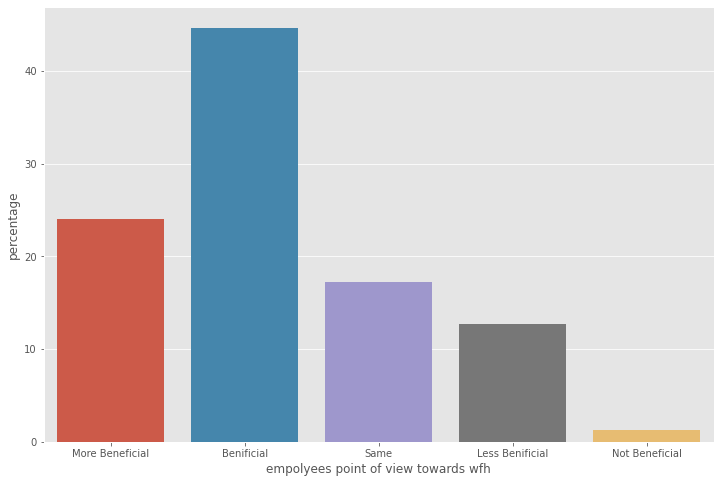

In [50]:
view=pd.DataFrame({"empolyees point of view towards wfh":["More Beneficial","Benificial","Same","Less Benificial","Not Beneficial"],"percentage":[24,44.7,17.3,12.7,1.3]})
plt.style.use("ggplot")
plt.subplots(figsize=(12,8))
fig=sb.barplot(x=view["empolyees point of view towards wfh"],y=view["percentage"],data=view)

In [51]:
wfh.dtypes

Gender    object
Age       object
C         object
D         object
E         object
F         object
H         object
I         object
J         object
K         object
L         object
M         object
N         object
O         object
dtype: object

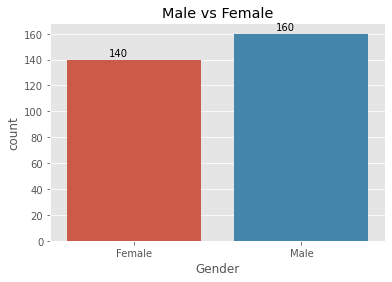

In [52]:
ax=sb.countplot(x="Gender",data=wfh)
plt.title("Male vs Female")
for p in ax.patches:
    ax.annotate("{:}".format(p.get_height()),(p.get_x()+0.25,p.get_height()+3))

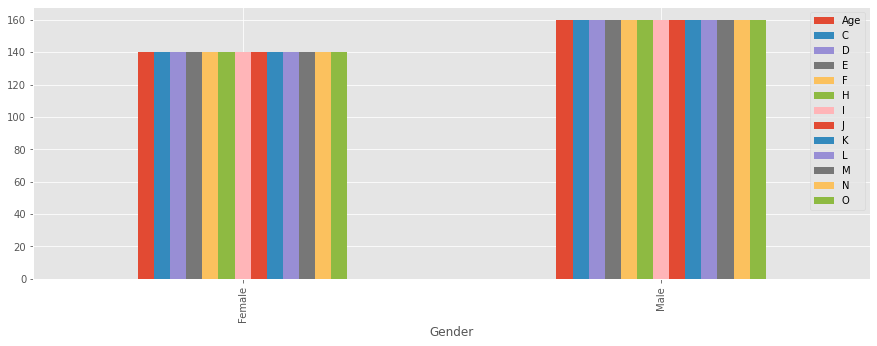

In [53]:
ax=wfh.groupby(["Gender"]).count().plot.bar(figsize=(15,5))

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
wfh.Gender.value_counts()

Male      160
Female    140
Name: Gender, dtype: int64

In [56]:
wfh.Age.value_counts()

25-50       146
18-25       136
Above 50     18
Name: Age, dtype: int64

In [57]:
wfh.Age=le.fit_transform(wfh.Age);wfh.Age
wfh.Age.value_counts()

1    146
0    136
2     18
Name: Age, dtype: int64

In [58]:
wfh.C.value_counts()

Yes    258
No      42
Name: C, dtype: int64

In [59]:
wfh.C=le.fit_transform(wfh.C);wfh.C
wfh.C.value_counts()

1    258
0     42
Name: C, dtype: int64

In [60]:
wfh.D.value_counts()

75% - 100%    132
50% - 75%      99
25% - 50%      61
10% - 25%       8
Name: D, dtype: int64

In [61]:
wfh.D=le.fit_transform(wfh.D);wfh.D
wfh.D.value_counts()

3    132
2     99
1     61
0      8
Name: D, dtype: int64

In [62]:
wfh.E.value_counts()

Efficient           133
More Efficient       85
Same                 48
Inefficient          26
More Inefficient      8
Name: E, dtype: int64

In [63]:
wfh.E=le.fit_transform(wfh.E);wfh.E
wfh.E.value_counts()

0    133
2     85
4     48
1     26
3      8
Name: E, dtype: int64

In [64]:
wfh.F.value_counts()

Neck, Shoulders                                                                 67
Upper Back, Lower Back                                                          65
Knees                                                                           31
Neck, Shoulders;Upper Back, Lower Back                                          28
Hips/Thighs                                                                     15
Upper Back, Lower Back;Elbows, Wrist/Hands                                      15
Elbows, Wrist/Hands                                                             10
Elbows, Wrist/Hands;Hips/Thighs                                                  9
Ankles/Feet                                                                      8
Neck, Shoulders;Knees                                                            6
Upper Back, Lower Back;Elbows, Wrist/Hands;Hips/Thighs                           6
Upper Back, Lower Back;Hips/Thighs                                               6
Elbo

In [65]:
wfh.F=le.fit_transform(wfh.F);wfh.F
wfh.F.value_counts()

7     67
18    65
5     31
12    28
4     15
20    15
1     10
2      9
0      8
11     6
21     6
23     6
3      6
22     4
16     3
6      3
10     3
13     2
19     2
15     2
14     2
17     2
24     2
9      2
8      1
Name: F, dtype: int64

In [66]:
wfh.H.value_counts()

7-8 hours        127
Above 8 hours    103
Below 7 hours     70
Name: H, dtype: int64

In [67]:
wfh.H=le.fit_transform(wfh.H);wfh.H
wfh.H.value_counts()

0    127
1    103
2     70
Name: H, dtype: int64

In [68]:
wfh.I.value_counts()

Better         123
Same            73
Much Better     64
Worse           36
Much Worse       4
Name: I, dtype: int64

In [69]:
wfh.I=le.fit_transform(wfh.I);wfh.I
wfh.I.value_counts()

0    123
3     73
1     64
4     36
2      4
Name: I, dtype: int64

In [70]:
wfh.J.value_counts()

More than 10 min     60
I Never Change       60
Every 10-30 min      56
Every 30-60 min      51
Every 1-3 hours      50
More than 3 hours    23
Name: J, dtype: int64

In [71]:
wfh.J=le.fit_transform(wfh.J);wfh.J
wfh.J.value_counts()

4    60
3    60
1    56
2    51
0    50
5    23
Name: J, dtype: int64

In [72]:
wfh.K.value_counts()

Yes    253
No      47
Name: K, dtype: int64

In [73]:
wfh.L.value_counts()

More Time         130
Much More Time     71
No Change          70
Less Time          25
Much Less Time      4
Name: L, dtype: int64

In [74]:
wfh.L=le.fit_transform(wfh.L);wfh.L
wfh.L.value_counts()

1    130
3     71
4     70
0     25
2      4
Name: L, dtype: int64

In [75]:
wfh.M.value_counts()

Relaxed           94
Stressful         77
Same              72
More Stressful    30
More Relaxed      27
Name: M, dtype: int64

In [76]:
wfh.M=le.fit_transform(wfh.M);wfh.M
wfh.M.value_counts()

2    94
4    77
3    72
1    30
0    27
Name: M, dtype: int64

In [77]:
wfh.N.value_counts()

Beneficial         136
More Beneficial     70
Same                53
Less Beneficial     37
Not Beneficial       4
Name: N, dtype: int64

In [78]:
wfh.N=le.fit_transform(wfh.N);wfh.N
wfh.N.value_counts()

0    136
2     70
4     53
1     37
3      4
Name: N, dtype: int64

In [79]:
wfh.O.value_counts()

Yes    239
No      61
Name: O, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [81]:
wfh.Gender=le.fit_transform(wfh.Gender)
wfh.Age=le.fit_transform(wfh.Age)
wfh.C=le.fit_transform(wfh.C)
wfh.D=le.fit_transform(wfh.D)
wfh.E=le.fit_transform(wfh.E)
wfh.F=le.fit_transform(wfh.F)
wfh.H=le.fit_transform(wfh.H)
wfh.I=le.fit_transform(wfh.I)
wfh.J=le.fit_transform(wfh.J)
wfh.K=le.fit_transform(wfh.K)
wfh.L=le.fit_transform(wfh.L)
wfh.M=le.fit_transform(wfh.M)
wfh.N=le.fit_transform(wfh.N)
wfh.O=le.fit_transform(wfh.O)


In [82]:
wfh.dtypes

Gender    int32
Age       int64
C         int64
D         int64
E         int64
F         int64
H         int64
I         int64
J         int64
K         int32
L         int64
M         int64
N         int64
O         int32
dtype: object

In [118]:
x=wfh.iloc[:,0:13]
y=wfh.iloc[:,-1]


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [121]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240, 13), (60, 13), (240,), (60,))

# LOGISTIC REGRESSION

In [122]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [123]:
lg.fit(x_train,y_train)

LogisticRegression()

In [124]:
lg_p=lg.predict(x_test)
lg_p

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[ 4,  0],
       [ 4, 52]], dtype=int64)

In [127]:
(4+52)/(4+4+0+52)

0.9333333333333333

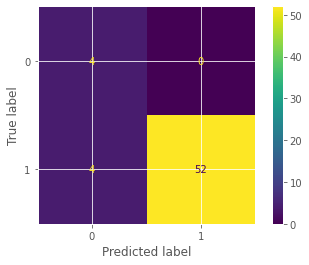

In [128]:
labels=[0,1]
cm=confusion_matrix(lg_p,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=lg_m,display_labels=labels)
disp.plot();

In [129]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

93.33333333333333

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.93      0.96        56

    accuracy                           0.93        60
   macro avg       0.75      0.96      0.81        60
weighted avg       0.97      0.93      0.94        60



In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [133]:
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

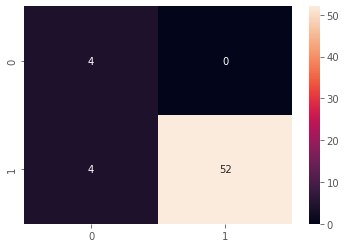

In [135]:
sns.heatmap(confusion_matrix(lg_p,y_test),annot=True)

# Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [147]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [148]:
dt1_p=dt1.predict(x_test)
dt1_p

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [149]:
dt1_cf1=confusion_matrix(dt1_p,y_test)
dt1_cf1

array([[ 7,  6],
       [ 1, 46]], dtype=int64)

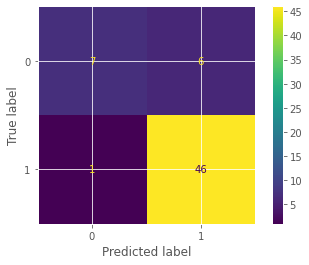

In [150]:
labels=[0,1]
cm=confusion_matrix(dt1_p,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=dt1_cf1,display_labels=labels)
disp.plot();

In [151]:
dt1_acc2=dt1_cf1.diagonal().sum()/dt1_cf1.sum()*100
dt1_acc2

88.33333333333333

In [152]:
print(classification_report(dt1_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.88      0.98      0.93        47

    accuracy                           0.88        60
   macro avg       0.88      0.76      0.80        60
weighted avg       0.88      0.88      0.87        60



In [153]:
dt1.feature_importances_

array([0.01225615, 0.06128077, 0.42716054, 0.04096306, 0.06643594,
       0.1087824 , 0.02918132, 0.02042692, 0.05212763, 0.00542027,
       0.05031897, 0.02541072, 0.10023531])

In [154]:
dt1_df1=pd.DataFrame({"Importance":list(dt1.feature_importances_),"columns":list(x)})
dt1_df1

,Importance,columns
0,0.012256,Gender
1,0.061281,Age
2,0.427161,C
3,0.040963,D
4,0.066436,E
5,0.108782,F
6,0.029181,H
7,0.020427,I
8,0.052128,J
9,0.005420,K


In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [156]:
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

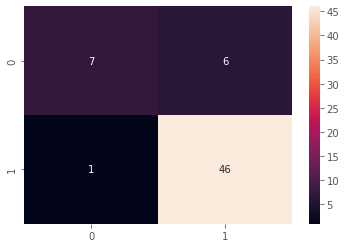

In [157]:
sns.heatmap(confusion_matrix(dt1_p,y_test),annot=True)

# RandomForest

In [158]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [159]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [160]:
rf_p=rf.predict(x_test)
rf_p

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [161]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[ 6,  2],
       [ 2, 50]], dtype=int64)

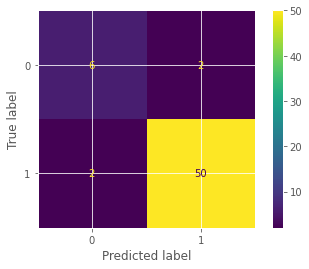

In [162]:
labels=[0,1]
cm=confusion_matrix(rf_p,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=rf_cf,display_labels=labels)
disp.plot();

In [163]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

93.33333333333333

In [164]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.96      0.96      0.96        52

    accuracy                           0.93        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.93      0.93      0.93        60



In [165]:
dt1.feature_importances_

array([0.01225615, 0.06128077, 0.42716054, 0.04096306, 0.06643594,
       0.1087824 , 0.02918132, 0.02042692, 0.05212763, 0.00542027,
       0.05031897, 0.02541072, 0.10023531])

In [166]:
df1=pd.DataFrame({"Importance":list(rf.feature_importances_),"columns":list(x)})
df1

,Importance,columns
0,0.028853,Gender
1,0.049803,Age
2,0.218530,C
3,0.147480,D
4,0.069958,E
5,0.099637,F
6,0.041261,H
7,0.076967,I
8,0.067939,J
9,0.025210,K


In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [139]:
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

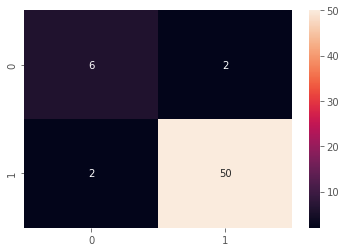

In [140]:
sns.heatmap(confusion_matrix(rf_p,y_test),annot=True)

# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=5)

In [81]:
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [82]:
k2_p2=knn1.predict(x_test)
#k2_p2

In [83]:
ck1=confusion_matrix(k2_p2,y_test)
ck1

array([[ 2,  0],
       [ 6, 52]], dtype=int64)

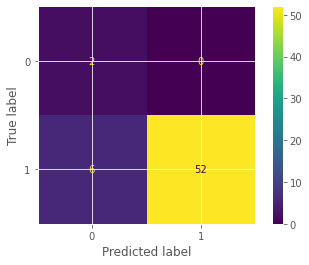

In [84]:
labels=[0,1]
cm=confusion_matrix(k2_p2,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=ck1,display_labels=labels)
disp.plot();

In [85]:
kacc1=ck1.diagonal().sum()/ck1.sum()*100
kacc1

90.0

In [86]:
print(classification_report(k2_p2,y_test))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       1.00      0.90      0.95        58

    accuracy                           0.90        60
   macro avg       0.62      0.95      0.67        60
weighted avg       0.97      0.90      0.93        60



In [87]:
lst=list()

In [88]:
for i in range (1,15):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    kn_pred=knn1.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

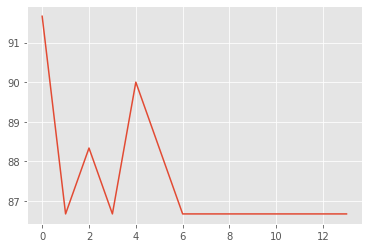

In [89]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# SVM

In [90]:
from sklearn.svm import SVC

svc2=SVC()

In [91]:
svc2.fit(x_train,y_train)

SVC()

In [92]:
s_p2=svc2.predict(x_test)
s_p2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
cs2=confusion_matrix(s_p2,y_test)
cs2

array([[ 1,  0],
       [ 7, 52]], dtype=int64)

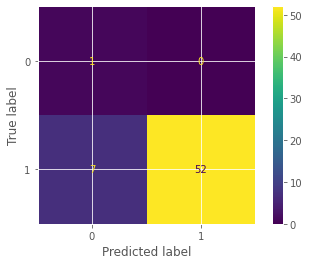

In [94]:
labels=[0,1]
cm=confusion_matrix(s_p2,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cs2,display_labels=labels)
disp.plot();

In [95]:
acc_s2=cs2.diagonal().sum()/cs2.sum()*100
acc_s2

88.33333333333333

In [96]:
print(classification_report(s_p2,y_test))

              precision    recall  f1-score   support

           0       0.12      1.00      0.22         1
           1       1.00      0.88      0.94        59

    accuracy                           0.88        60
   macro avg       0.56      0.94      0.58        60
weighted avg       0.99      0.88      0.93        60



# naive bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [98]:
nb.fit(x_train,y_train)

MultinomialNB()

In [99]:
n_p=nb.predict(x_test)
#n_p

In [100]:
nc=confusion_matrix(n_p,y_test)
nc

array([[ 4,  2],
       [ 4, 50]], dtype=int64)

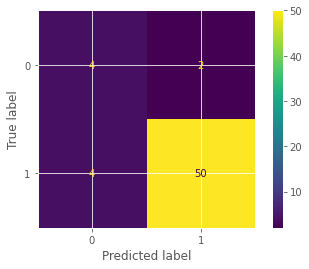

In [101]:
labels=[0,1]
cm=confusion_matrix(n_p,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=nc,display_labels=labels)
disp.plot();

In [102]:
n_ac=nc.diagonal().sum()/nc.sum()*100
n_ac

90.0

In [103]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.96      0.93      0.94        54

    accuracy                           0.90        60
   macro avg       0.73      0.80      0.76        60
weighted avg       0.92      0.90      0.91        60



In [104]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-1.77534188]
The coefficient b1=  [[ 0.47613742  0.19269188  2.48899758  0.92761813 -0.0948589   0.05445852
  -0.03523251 -0.24650894  0.04399657  0.06261674 -0.11667674 -0.5563141
   0.4376783 ]]


In [105]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train);x_train
logit_model=sm.Logit(y_train,x_train);logit_model
result=logit_model.fit();result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287075
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      O   No. Observations:                  240
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           13
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.4563
Time:                        13:53:57   Log-Likelihood:                -68.898
converged:                       True   LL-Null:                       -126.71
Covariance Type:            nonrobust   LLR p-value:                 1.468e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9333      1.184     -1.633      0.102      -4.253       0.387
Gender         0.7359      0.

In [106]:
df=pd.DataFrame(wfh)
df.drop(["E","F","G","H","I","J","K","L","M","N"], axis=1)

KeyError: "['G'] not found in axis"

In [ ]:
x1=df.iloc[:,0:4]
y1=df.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.2,random_state=100)

In [ ]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
lg.fit(x1_train,y1_train)

In [ ]:
lg_p=lg.predict(x1_test)
lg_p

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
lg_m=confusion_matrix(lg_p,y1_test)
lg_m

In [ ]:
(3+24)/(3+1+2+24)

In [ ]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(lg_p,y_test))

In [ ]:
df1=pd.DataFrame(wfh)
df1.drop(["C","D","E","F","G","H","I","J","K","L","M"], axis=1)

In [ ]:
x4=df1.iloc[:,0:3]
y4=df1.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=.2,random_state=100)

In [ ]:
x4_train.shape,x4_test.shape,y4_train.shape,y4_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
lg.fit(x4_train,y4_train)

In [ ]:
lg_p=lg.predict(x4_test)
lg_p

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
lg_m=confusion_matrix(lg_p,y4_test)
lg_m

v=(4+52)/(4+4+52)=v

In [ ]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

In [ ]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.93      0.96        56

    accuracy                           0.93        60
   macro avg       0.75      0.96      0.81        60
weighted avg       0.97      0.93      0.94        60



In [108]:
df3=pd.DataFrame(wfh)
df3.drop(["C","D","E","K","L","M","N"], axis=1)

,Gender,Age,F,H,I,J,O
0,0,0,11,2,0,1,1
1,0,0,0,0,0,4,1
2,1,1,18,0,1,3,1
3,1,0,12,1,0,0,1
4,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...
295,0,0,5,0,0,4,1
296,1,0,7,1,4,1,0
297,0,0,3,1,0,1,1
298,0,1,7,1,3,1,1


In [109]:
x3=df3.iloc[:,0:7]
y3=df3.iloc[:,-1]


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=.2,random_state=100)

In [112]:
x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape

((240, 7), (60, 7), (240,), (60,))

In [113]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [114]:
lg.fit(x3_train,y3_train)

LogisticRegression()

In [115]:
lg_p=lg.predict(x3_test)
lg_p

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
from sklearn.metrics import confusion_matrix


In [117]:
lg_m=confusion_matrix(lg_p,y3_test)
lg_m

array([[ 4,  0],
       [ 4, 52]], dtype=int64)

In [118]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

93.33333333333333

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(lg_p,y3_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.93      0.96        56

    accuracy                           0.93        60
   macro avg       0.75      0.96      0.81        60
weighted avg       0.97      0.93      0.94        60



In [121]:
data=pd.DataFrame([["Male",130,30],["Women",109,31]],columns=["Gender","Yes","No"]);data

,Gender,Yes,No
0,Male,130,30
1,Women,109,31


In [122]:
data.iloc[:,1:].values

array([[130,  30],
       [109,  31]], dtype=int64)

In [123]:
from scipy.stats  import chi2_contingency
stat, p, dof, expected = chi2_contingency(data.iloc[:,1:].values)
print('The Chi-Square value is {:.3f}.\nDegree of freedom is {}.\nExpected table value is \n {}'.format(stat,dof,expected))

The Chi-Square value is 0.342.
Degree of freedom is 1.
Expected table value is 
 [[127.46666667  32.53333333]
 [111.53333333  28.46666667]]


In [124]:
data1=pd.DataFrame([["18-25",106,30],["25-50",124,22],["above 50",9,9]],columns=["Age","Yes","No"]);data1

,Age,Yes,No
0,18-25,106,30
1,25-50,124,22
2,above 50,9,9


In [125]:
data1.iloc[:,1:].values

array([[106,  30],
       [124,  22],
       [  9,   9]], dtype=int64)

In [126]:
from scipy.stats  import chi2_contingency
stat, p, dof, expected = chi2_contingency(data1.iloc[:,1:].values)
print('The Chi-Square value is {:.3f}.\nDegree of freedom is {}.\nExpected table value is \n {}'.format(stat,dof,expected))

The Chi-Square value is 12.528.
Degree of freedom is 2.
Expected table value is 
 [[108.34666667  27.65333333]
 [116.31333333  29.68666667]
 [ 14.34         3.66      ]]


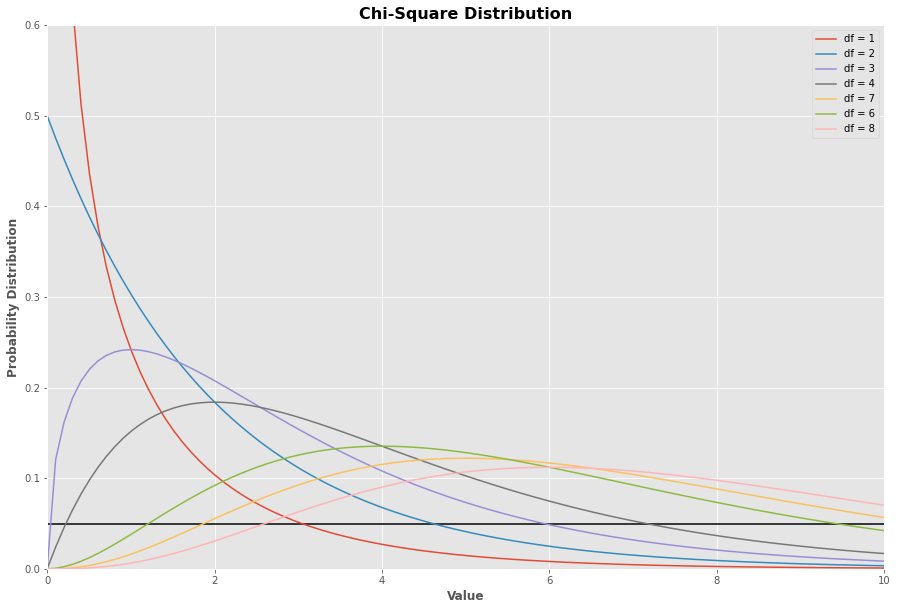

In [127]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
# f=fig.figure(figsize=(2, 2))

fig,ax = plt.subplots(1,1, figsize=(15,10))

plt.axhline(y=0.05, xmin=0, xmax= 10,color='black')


deg_of_freedom = [1, 2, 3, 4, 7, 6,8]
for df in deg_of_freedom:
  ax.plot(x, stats.chi2.pdf(x, df), label='df = '+ str(df))


ax.set_xlabel('Value',fontsize=12, fontweight='bold')
ax.set_ylabel('Probability Distribution',fontsize=12,fontweight='bold')
ax.set_title('Chi-Square Distribution',fontsize=16,fontweight='bold')

plt.xlim(0, 10)
plt.ylim(0, 0.6)


plt.legend()
plt.show()


(0.0, 0.6)

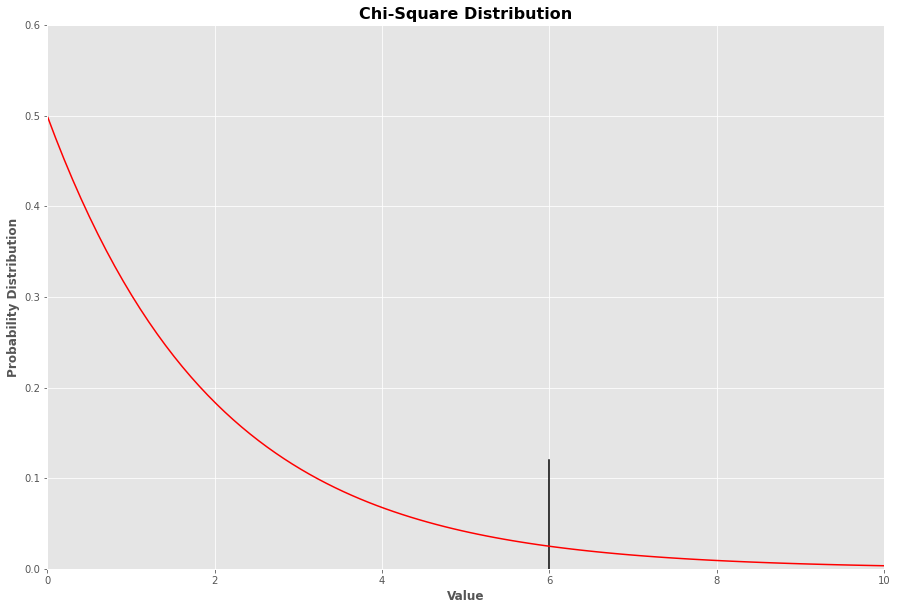

In [128]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)


fig,ax = plt.subplots(1,1, figsize=(15,10))

#plotting vertical line for critical value 
plt.axvline(x=stats.chi2.isf(0.05,dof), ymin=0, ymax= 0.2,label='X-Critical',color='black')

#plotting vertical line for calculated value. 
plt.axvline(x=stat, ymin=0, ymax= 0.3,label='X-calculated',color='blue')

#plotting distribution graph for our calculated degrees of freedom
ax.plot(x, stats.chi2.pdf(x, dof), label='df = '+ str(dof), color='red')

ax.set_xlabel('Value',fontsize=12, fontweight='bold')
ax.set_ylabel('Probability Distribution',fontsize=12,fontweight='bold')
ax.set_title('Chi-Square Distribution',fontsize=16,fontweight='bold')

plt.xlim(0, 10)
plt.ylim(0, 0.6)

(0.0, 0.6)

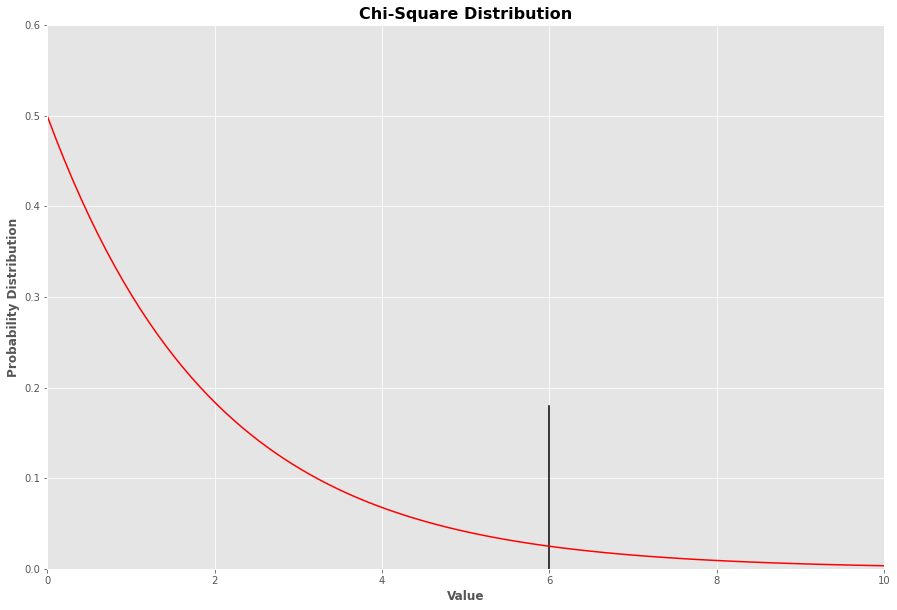

In [129]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)


fig,ax = plt.subplots(1,1, figsize=(15,10))

#plotting vertical line for critical value 
plt.axvline(x=stats.chi2.isf(0.05,dof), ymin=0, ymax= 0.3,label='X-Critical',color='black')

#plotting vertical line for calculated value. 
plt.axvline(x=stat, ymin=0, ymax= 0.3,label='X-calculated',color='blue')

#plotting distribution graph for our calculated degrees of freedom
ax.plot(x, stats.chi2.pdf(x, dof), label='df = '+ str(dof), color='red')

ax.set_xlabel('Value',fontsize=12, fontweight='bold')
ax.set_ylabel('Probability Distribution',fontsize=12,fontweight='bold')
ax.set_title('Chi-Square Distribution',fontsize=16,fontweight='bold')

plt.xlim(0, 10)
plt.ylim(0, 0.6)

In [130]:
data2=pd.DataFrame([["Neck, Shoulders ",17,15,9,12,9,5],["Upper Back, Lower Back ",15,10,10,10,12,8],["Knees ",9,8,8,4,2,0],["Neck, Shoulders;Upper Back, Lower Back",3,4,3,8,5,5]],columns=["F","I Never Change","More than 10 min","Every 10-30 min","Every 30-60 min","Every 1-3 hours","More than 3 hours"]);data2

,F,I Never Change,More than 10 min,Every 10-30 min,Every 30-60 min,Every 1-3 hours,More than 3 hours
0,"Neck, Shoulders",17,15,9,12,9,5
1,"Upper Back, Lower Back",15,10,10,10,12,8
2,Knees,9,8,8,4,2,0
3,"Neck, Shoulders;Upper Back, Lower Back",3,4,3,8,5,5


In [131]:
data2.iloc[:,1:].values

array([[17, 15,  9, 12,  9,  5],
       [15, 10, 10, 10, 12,  8],
       [ 9,  8,  8,  4,  2,  0],
       [ 3,  4,  3,  8,  5,  5]], dtype=int64)

In [132]:
from scipy.stats  import chi2_contingency
stat, p, dof, expected = chi2_contingency(data2.iloc[:,1:].values)
print('The Chi-Square value is {:.3f}.\nDegree of freedom is {}.\nExpected table value is \n {}'.format(stat,dof,expected))

The Chi-Square value is 17.722.
Degree of freedom is 15.
Expected table value is 
 [[15.43455497 12.97905759 10.52356021 11.92670157  9.82198953  6.31413613]
 [14.97382199 12.59162304 10.20942408 11.57068063  9.52879581  6.12565445]
 [ 7.14136126  6.0052356   4.86910995  5.51832461  4.54450262  2.92146597]
 [ 6.45026178  5.42408377  4.39790576  4.98429319  4.10471204  2.63874346]]


In [133]:
df3=pd.DataFrame(wfh)
df3.drop(["Gender","Age","D","E","F","G","H","I","J","K","L","M","N",], axis=1)

KeyError: "['G'] not found in axis"

In [134]:
x3=df3.iloc[:,0:1]
y3=df3.iloc[:,-1]


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=.2,random_state=100)

In [137]:
x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape

((240, 1), (60, 1), (240,), (60,))

In [138]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [139]:
lg.fit(x3_train,y3_train)

LogisticRegression()

In [140]:
lg_p=lg.predict(x3_test)
lg_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [141]:
from sklearn.metrics import confusion_matrix


In [142]:
lg_m=confusion_matrix(lg_p,y3_test)
lg_m

array([[ 0,  0],
       [ 8, 52]], dtype=int64)

In [143]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

86.66666666666667

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(lg_p,y3_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93        60

    accuracy                           0.87        60
   macro avg       0.50      0.43      0.46        60
weighted avg       1.00      0.87      0.93        60



In [146]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x3_train,y3_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [1.20187025]
The coefficient b1=  [[0.1121562]]


In [147]:
import statsmodels.api as sm
x3_train = sm.add_constant(x3_train);x3_train
logit_model=sm.Logit(y3_train,x3_train);logit_model
result=logit_model.fit();result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.527636
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      O   No. Observations:                  240
Model:                          Logit   Df Residuals:                      238
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:               0.0006152
Time:                        13:55:10   Log-Likelihood:                -126.63
converged:                       True   LL-Null:                       -126.71
Covariance Type:            nonrobust   LLR p-value:                    0.6929
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1963      0.224      5.345      0.000       0.758       1.635
Gender         0.1230      0.

In [148]:
wfh

,Gender,Age,C,D,E,F,H,I,J,K,L,M,N,O
0,0,0,1,3,2,11,2,0,1,1,4,2,0,1
1,0,0,1,1,0,0,0,0,4,1,1,1,2,1
2,1,1,1,3,2,18,0,1,3,1,3,1,2,1
3,1,0,1,3,0,12,1,0,0,1,1,4,0,1
4,0,1,1,3,0,0,0,0,1,1,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,1,3,0,5,0,0,4,1,0,2,0,1
296,1,0,0,1,1,7,1,4,1,1,4,1,1,0
297,0,0,1,2,0,3,1,0,1,1,1,2,4,1
298,0,1,1,2,4,7,1,3,1,1,1,2,0,1


In [149]:
data=pd.DataFrame([["Yes",233,25],["No",6,36]],columns=["O","Yes","No"]);data

,O,Yes,No
0,Yes,233,25
1,No,6,36


In [150]:
data.iloc[:,1:].values

array([[233,  25],
       [  6,  36]], dtype=int64)

In [151]:
from scipy.stats  import chi2_contingency
stat, p, dof, expected = chi2_contingency(data.iloc[:,1:].values)
print('The Chi-Square value is {:.3f}.\nDegree of freedom is {}.\nExpected table value is \n {}'.format(stat,dof,expected))

The Chi-Square value is 124.224.
Degree of freedom is 1.
Expected table value is 
 [[205.54  52.46]
 [ 33.46   8.54]]


In [152]:
df3=pd.DataFrame(wfh)
df3.drop(["Gender","Age","D","E","F","G","H","I","J","K","L","M","N",], axis=1)

KeyError: "['G'] not found in axis"